In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
% matplotlib inline

In [83]:
df_train = pd.read_csv('dataset/train_ZoGVYWq.csv')
df_test = pd.read_csv('dataset/test_66516Ee.csv')
df_submission = pd.read_csv('dataset/sample_submission_sLex1ul.csv')

In [84]:
df_train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [85]:
df_test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600


In [86]:
df_submission.head()

,id,renewal,incentives
0,649,0.5,1650
1,81136,0.5,1650
2,70762,0.5,1650
3,53935,0.5,1650
4,15476,0.5,1650


In [87]:
df_train.drop('id', axis=1).describe()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
count,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


## Checking missing values

In [88]:
df_train.isna().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
renewal                                0
dtype: int64

In [89]:
df_test.isna().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
dtype: int64

## Imputing missing values with mean

In [90]:
df_train_nonan = df_train.fillna(df_train.mean())

In [91]:
df_test_nonan = df_test.fillna(df_train.mean())

## One hot encoded categorical columns

In [92]:
df_train_nonan = pd.get_dummies(df_train_nonan)
df_test_nonan = pd.get_dummies(df_test_nonan)

In [93]:
len(df_train_nonan.columns)

18

In [94]:
len(df_test_nonan.columns)

17

## Data Visualization

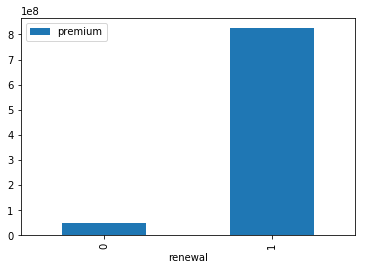

In [130]:
df_train_nonan[df_train_nonan['renewal'] == 1]['premium'].sum()
df_train_nonan[df_train_nonan['renewal'] == 0]['premium'].sum()

df_train_nonan[['renewal','premium']].groupby('renewal').sum().plot(kind='bar')

##  Relationship b/w Extra efforts in hours invested by an agent and Incentive to agent. After a point more incentives does not convert to extra efforts.

X = Incentives

Y = Effort (Hours)

Y = 10*(1-exp(-X/400))

## Relationship between % improvement in renewal probability vs Agent effort in hours. The renewal probability cannot be improved beyond a certain level even with more efforts.

Y = Effort (Hours)

Z = % improvement in renewal

Z = 20*(1-exp(-Y/5))

In [95]:
def rel_efforts_incentive(incentive):
    return 10 * (1 - np.exp(-incentive / 400))

def rel_improvement_efforts(efforts):
    return 20 * (1 - np.exp(-efforts / 5))

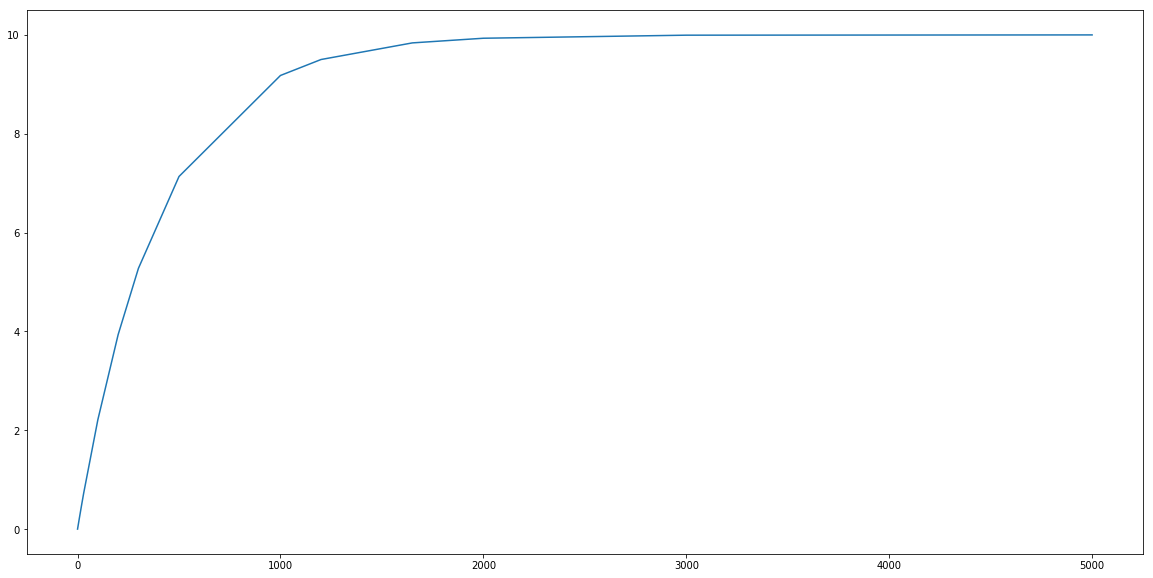

In [122]:
a = [0, 2, 3, 5, 7, 9, 10, 20, 30, 100, 200, 300, 500, 1000, 1200, 1650, 2000, 3000, 5000]
b = [rel_efforts_incentive(x) for x in a]

plt.figure(figsize=(20, 10))
plt.plot(a,b)

In [124]:
b

[0.0,
 0.0498752080731768,
 0.07471945180861583,
 0.12422199506118559,
 0.17347764334926796,
 0.22248762806663658,
 0.24690087971667385,
 0.48770575499285984,
 0.7225651367144714,
 2.211992169285951,
 3.9346934028736658,
 5.276334472589853,
 7.1349520313980985,
 9.179150013761012,
 9.50212931632136,
 9.838365054118341,
 9.932620530009146,
 9.994469156298521,
 9.99996273346828]

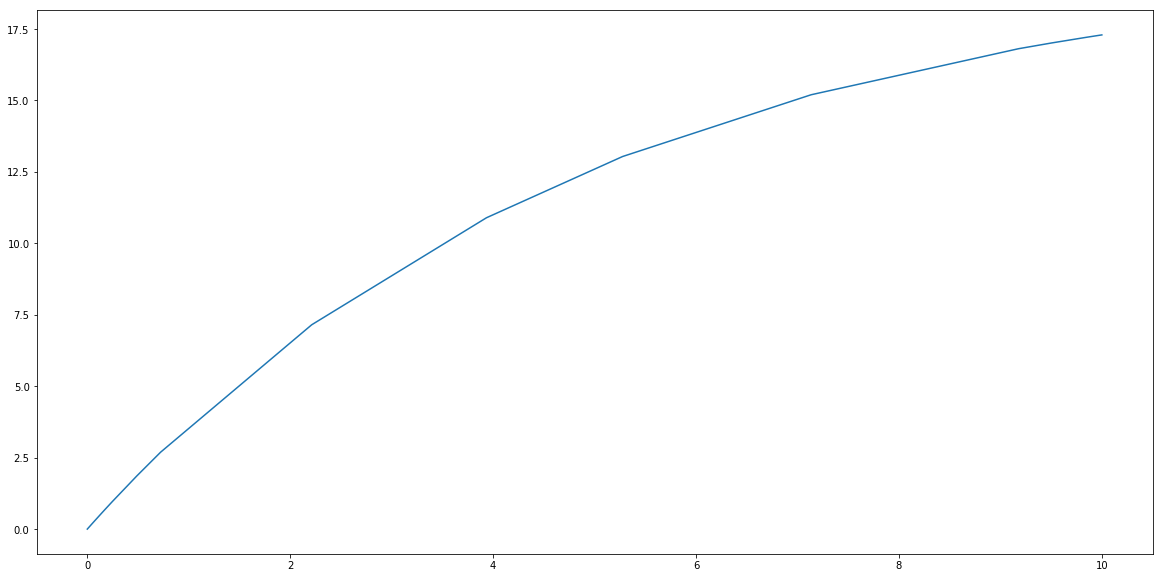

In [125]:
# a = [0, 2, 3, 5, 7, 9, 10, 12, 15, 17, 20]
c = [rel_improvement_efforts(x) for x in b]

plt.figure(figsize=(20, 10))
plt.plot(b,c)

In [96]:
df_train_nonan['incentives'] = [1650 for i in range(len(df_train_nonan))]
df_train_nonan['efforts'] = df_train_nonan['incentives'].apply(rel_efforts_incentive)
df_train_nonan['improvement'] = df_train_nonan['efforts'].apply(rel_improvement_efforts)

In [97]:
df_test_nonan['incentives'] = [1650 for i in range(len(df_test_nonan))]
df_test_nonan['efforts'] = df_test_nonan['incentives'].apply(rel_efforts_incentive)
df_test_nonan['improvement'] = df_test_nonan['efforts'].apply(rel_improvement_efforts)

In [74]:
X = 1650

Y = 10 * (1 - np.exp(-X/400))
Y

9.838365054118341

In [73]:
Z = 20 * (1 - np.exp(-Y/5))
Z

17.20436502651916

## Total Net Revenue

In [ ]:
pBenchmark = df['proba_renewal']
pImprovement = Z
premium = df['premium']
incentives = X

total_net_revenue = np.sum((pBenchmark + pImprovement) * premium - incentives)

## Save dataset

In [98]:
df_train_nonan.to_csv('dataset/df_train_nonan.csv', index=False)
df_test_nonan.to_csv('dataset/df_test_nonan.csv', index=False)